In [1]:
import matplotlib.pyplot as plt
import matplotlib.transforms as mtransforms
import matplotlib.patches as mpatch
from matplotlib.patches import FancyBboxPatch

In [4]:
styles = mpatch.BoxStyle.get_styles()
spacing = 1.2

figheight = (spacing * len(styles) + .5)
fig = plt.figure(figsize=(4 / 1.5, figheight / 1.5))
fontsize = 0.3 * 72

for i, stylename in enumerate(sorted(styles)):
    fig.text(0.5, (spacing * (len(styles) - i) - 0.5) / figheight, stylename,
             ha="center",
             size=fontsize,
             bbox=dict(boxstyle=stylename, fc="w", ec="k"))

<Figure size 192x542.4 with 0 Axes>

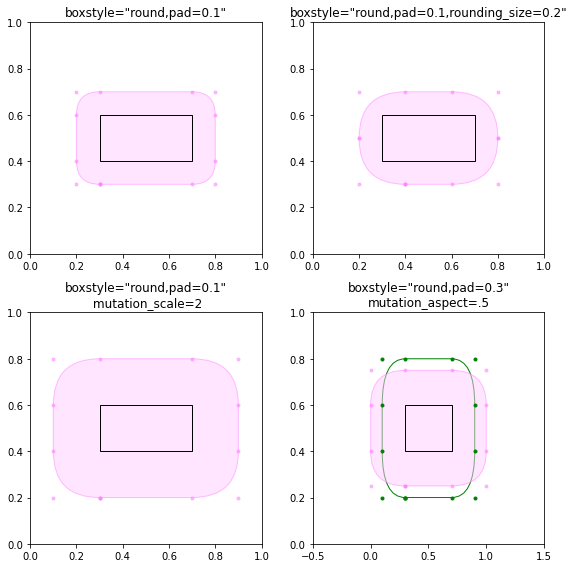

In [3]:
def add_fancy_patch_around(ax, bb, **kwargs):
    fancy = FancyBboxPatch((bb.xmin, bb.ymin), bb.width, bb.height,
                           fc=(1, 0.8, 1, 0.5), ec=(1, 0.5, 1, 0.5),
                           **kwargs)
    ax.add_patch(fancy)
    return fancy


def draw_control_points_for_patches(ax):
    for patch in ax.patches:
        patch.axes.plot(*patch.get_path().vertices.T, ".",
                        c=patch.get_edgecolor())


fig, axs = plt.subplots(2, 2, figsize=(8, 8))

# Bbox object around which the fancy box will be drawn.
bb = mtransforms.Bbox([[0.3, 0.4], [0.7, 0.6]])

ax = axs[0, 0]
# a fancy box with round corners. pad=0.1
fancy = add_fancy_patch_around(ax, bb, boxstyle="round,pad=0.1")
ax.set(xlim=(0, 1), ylim=(0, 1), aspect=1,
       title='boxstyle="round,pad=0.1"')

ax = axs[0, 1]
# bbox=round has two optional arguments: pad and rounding_size.
# They can be set during the initialization.
fancy = add_fancy_patch_around(ax, bb, boxstyle="round,pad=0.1")
# The boxstyle and its argument can be later modified with set_boxstyle().
# Note that the old attributes are simply forgotten even if the boxstyle name
# is same.
fancy.set_boxstyle("round,pad=0.1,rounding_size=0.2")
# or: fancy.set_boxstyle("round", pad=0.1, rounding_size=0.2)
ax.set(xlim=(0, 1), ylim=(0, 1), aspect=1,
       title='boxstyle="round,pad=0.1,rounding_size=0.2"')

ax = axs[1, 0]
# mutation_scale determines the overall scale of the mutation, i.e. both pad
# and rounding_size is scaled according to this value.
fancy = add_fancy_patch_around(
    ax, bb, boxstyle="round,pad=0.1", mutation_scale=2)
ax.set(xlim=(0, 1), ylim=(0, 1), aspect=1,
       title='boxstyle="round,pad=0.1"\n mutation_scale=2')

ax = axs[1, 1]
# When the aspect ratio of the axes is not 1, the fancy box may not be what you
# expected (green).
fancy = add_fancy_patch_around(ax, bb, boxstyle="round,pad=0.2")
fancy.set(facecolor="none", edgecolor="green")
# You can compensate this by setting the mutation_aspect (pink).
fancy = add_fancy_patch_around(
    ax, bb, boxstyle="round,pad=0.3", mutation_aspect=0.5)
ax.set(xlim=(-.5, 1.5), ylim=(0, 1), aspect=2,
       title='boxstyle="round,pad=0.3"\nmutation_aspect=.5')

for ax in axs.flat:
    draw_control_points_for_patches(ax)
    # Draw the original bbox (using boxstyle=square with pad=0).
    fancy = add_fancy_patch_around(ax, bb, boxstyle="square,pad=0")
    fancy.set(edgecolor="black", facecolor="none", zorder=10)

fig.tight_layout()


plt.show()